In [424]:
#The data set that was chosen for this project is the popularly used red wine quality data set that takes into account 11 different pieces of information about the wine and then
#has a score that people have gave the wine for its percieved quality. The goal of this project is to use the existing data set we are given in order to create an algorithm to 
#be able to predict the quality value of the wine given the 11 parameters for the wine.

import sklearn
import pandas
import numpy
import matplotlib.pyplot as plt
import numpy as np

#reading the data from csv file, I found pandas to be the easiest way to get it into a usable format.
df = pandas.read_csv('winequality-red.csv', sep=';')

y = df['quality']

x = df.drop('quality', axis=1)

from sklearn.model_selection import train_test_split

#splitting the data using sklearn into training set and test set using another sklearn tool
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

from sklearn.neighbors import KNeighborsClassifier
#using sklearn in order to run a knn algorithm
knn = KNeighborsClassifier(n_neighbors=7)
#using 7 as an abitrary value to test the accuracy of the algorithm, will explore differing values of k later on

#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=7, p=2, weights='uniform')

knn.fit(x_train, y_train)
#training dataset
y_pred = knn.predict(x_test)
#using triaining dataset to predict the test data we split earlier
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#measuring the difference between what we predicted vs. the actual known values of the test data set

#display(numpy.round(df.describe()))
    

Accuracy: 0.5


In [425]:
#removing outliters to see if there is any change in accuracy
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#calculating the inner-quartile range in order to differentiate the data set from the outliers
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#removing the outliers from the dataset
df_out.shape

y_out = df_out['quality']

x_out = df_out.drop('quality', axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_out, y_out, test_size=0.2, random_state=1)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#display(numpy.round(df_out.describe()))

Accuracy: 0.5550847457627118


In [426]:
#removing the outliers seemed to improve the accuracy of the algorithm a slight amount, now I will test if scaling the data will have any effect since knn is based off of Distance

from sklearn.preprocessing import scale

xs = scale(x_out)

from sklearn.cross_validation import train_test_split

xs_train, xs_test, y_train, y_test = train_test_split(xs, y_out, test_size=0.2, random_state=1)

knn_scaled = KNeighborsClassifier(n_neighbors=7)

knn_scaled.fit(xs_train, y_train)

y_pred = knn_scaled.predict(xs_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.6186440677966102


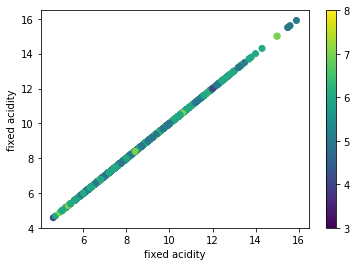

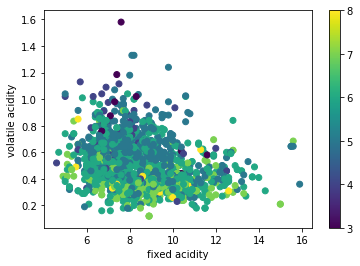

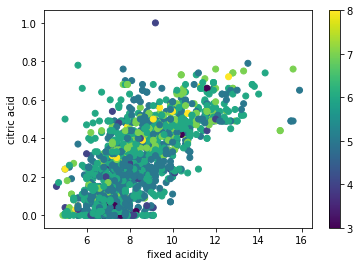

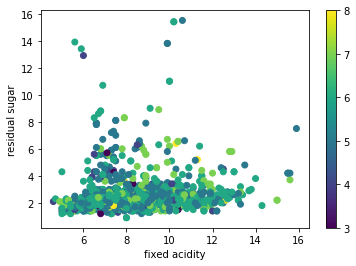

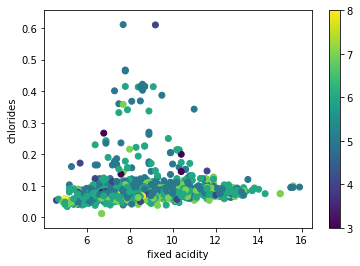

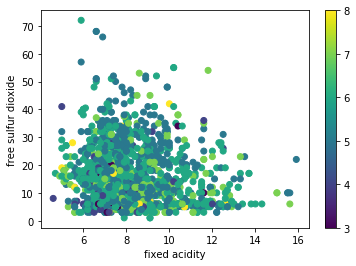

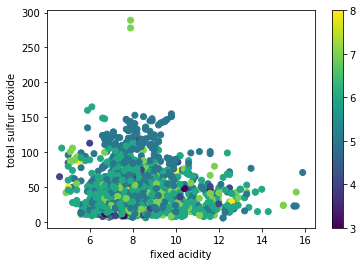

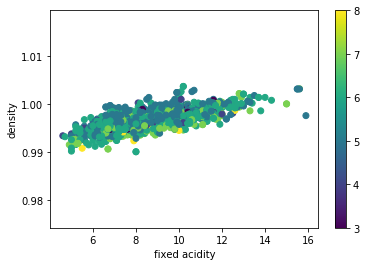

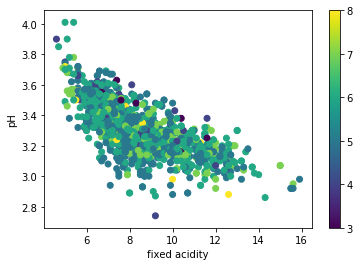

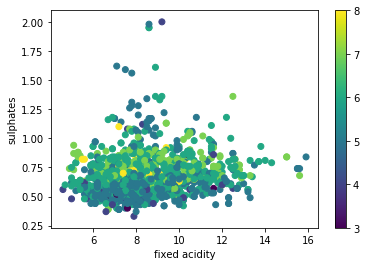

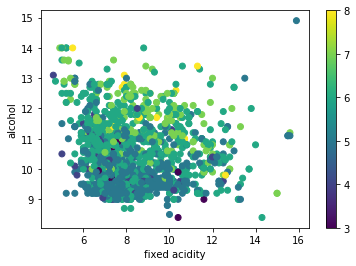

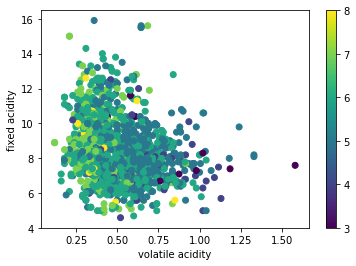

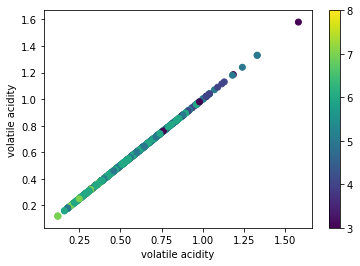

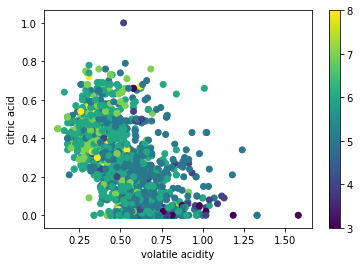

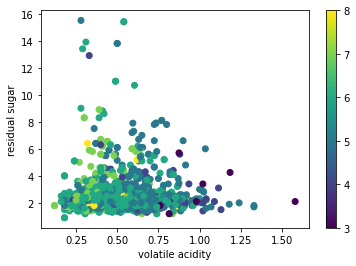

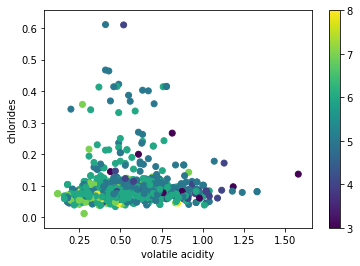

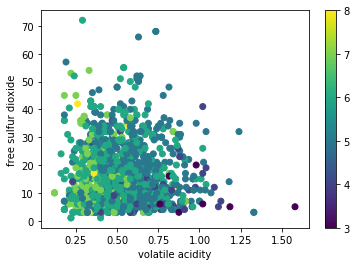

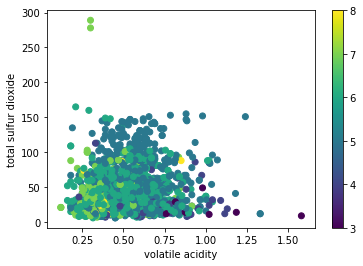

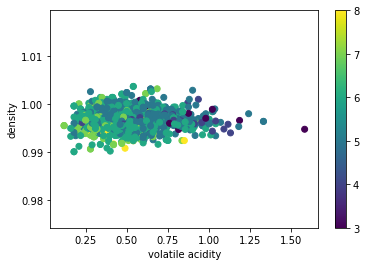

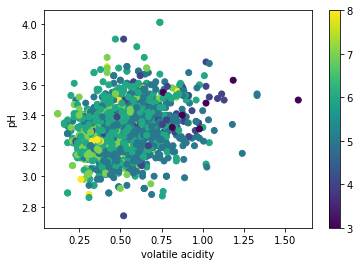

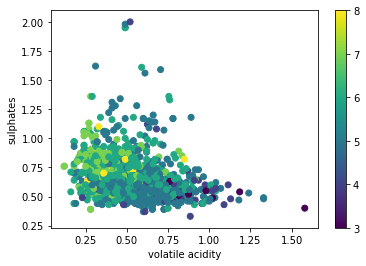

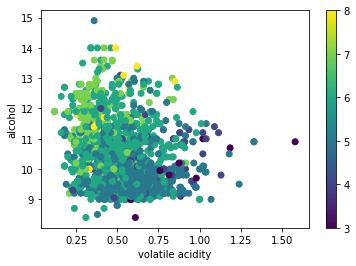

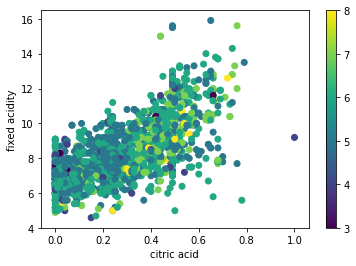

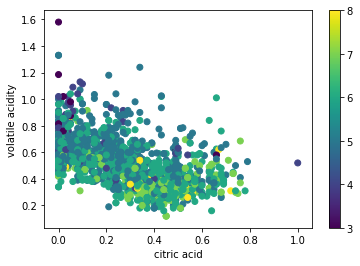

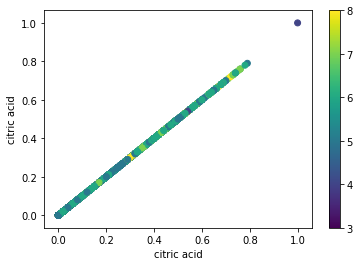

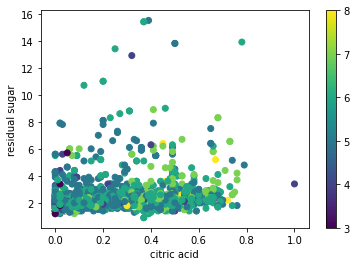

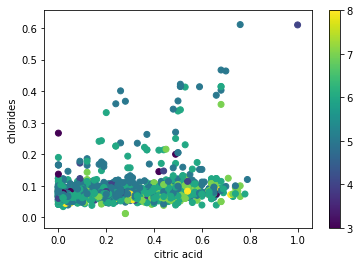

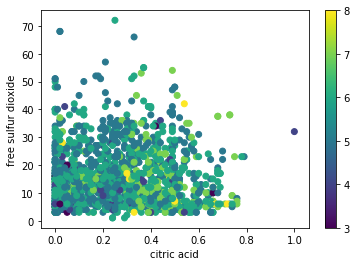

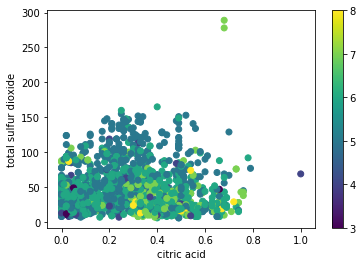

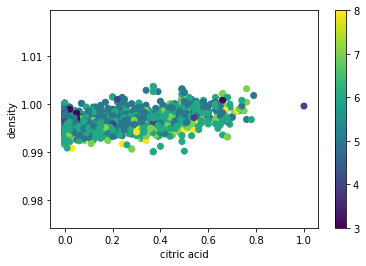

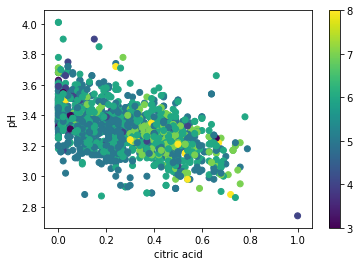

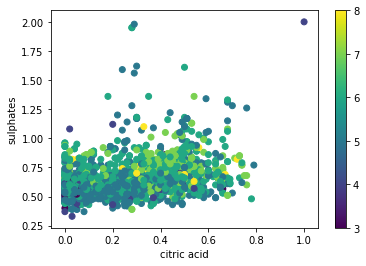

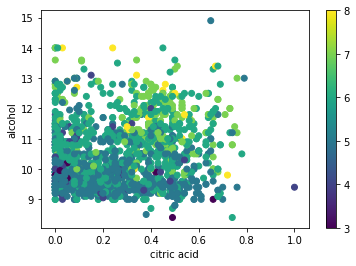

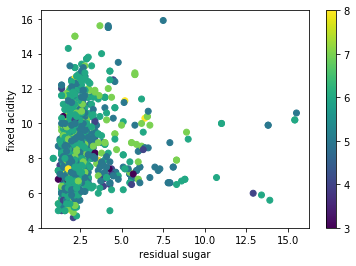

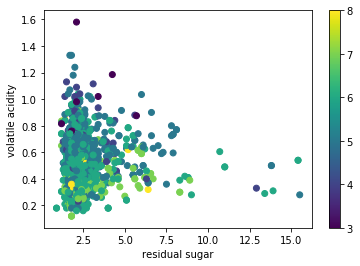

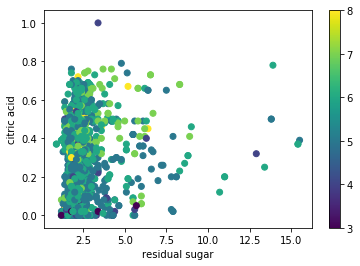

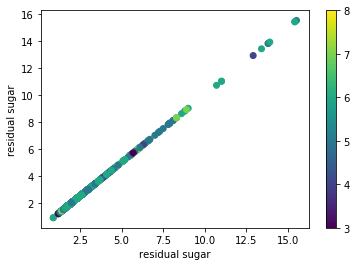

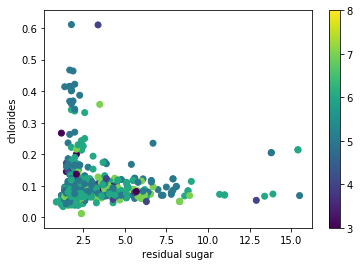

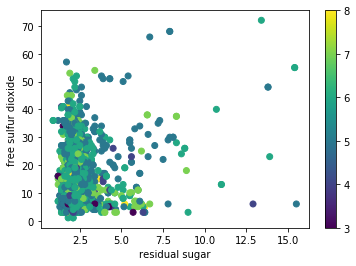

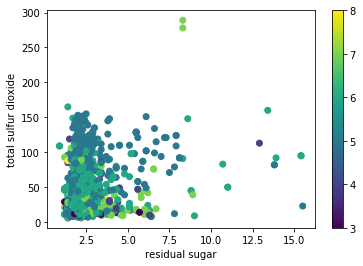

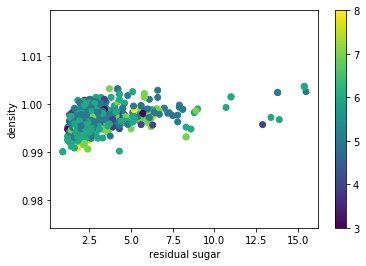

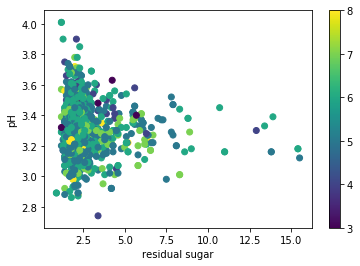

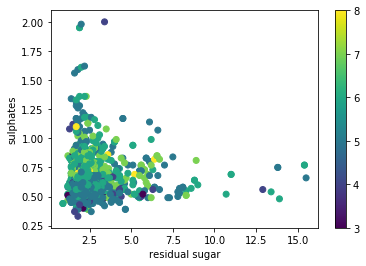

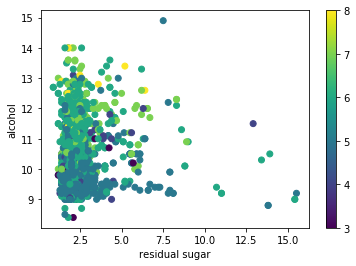

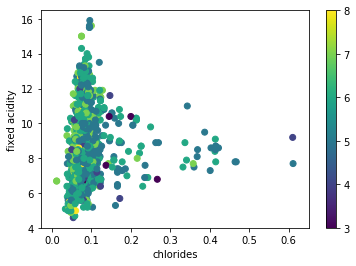

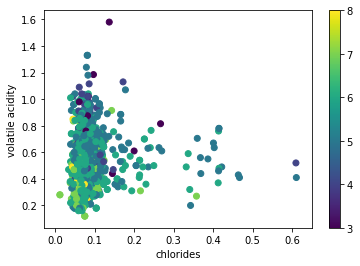

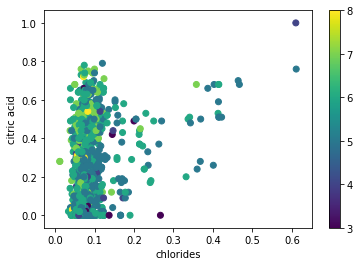

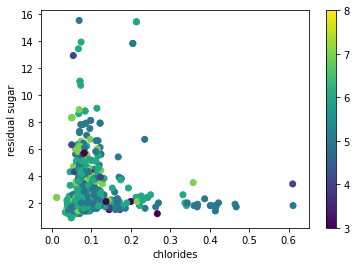

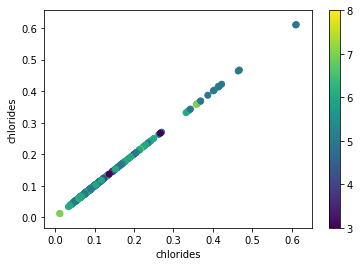

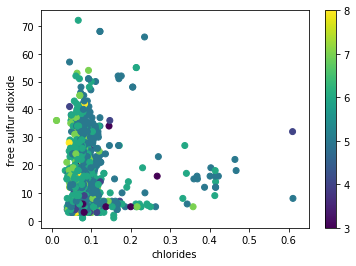

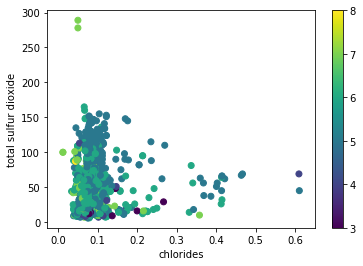

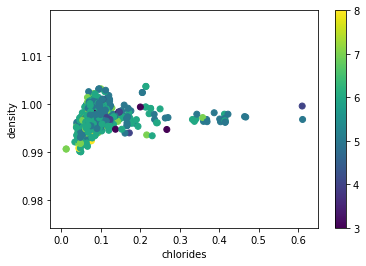

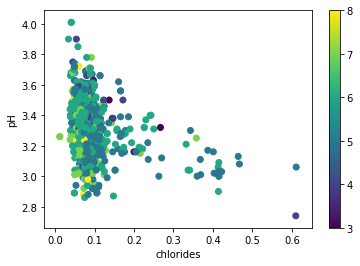

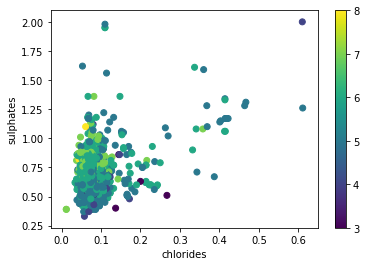

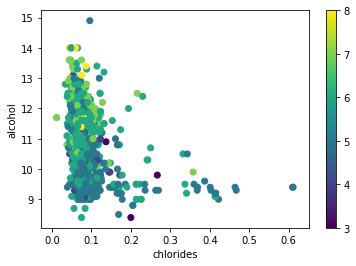

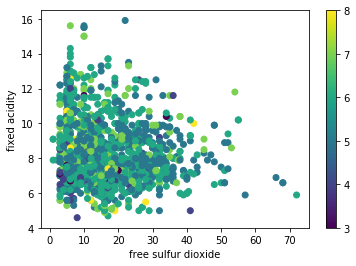

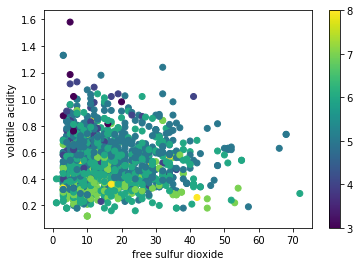

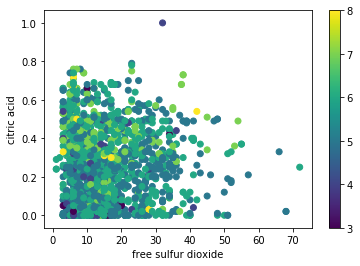

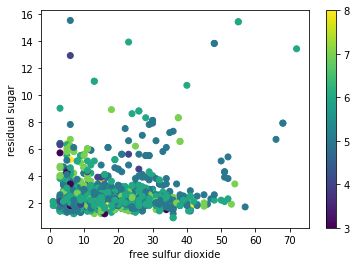

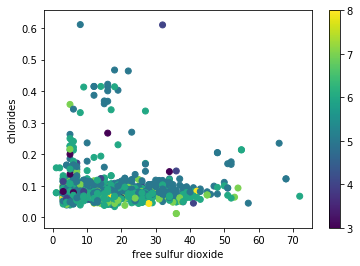

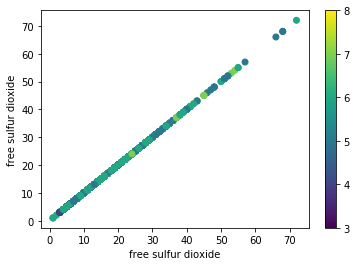

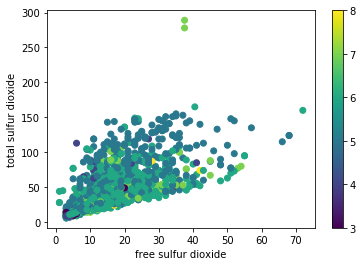

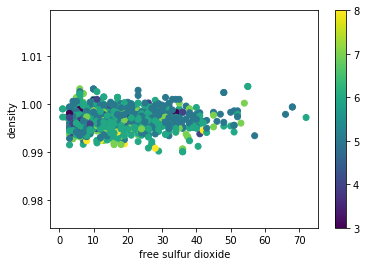

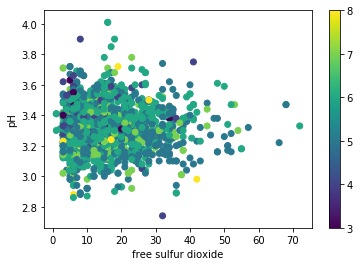

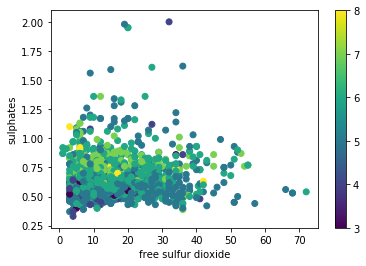

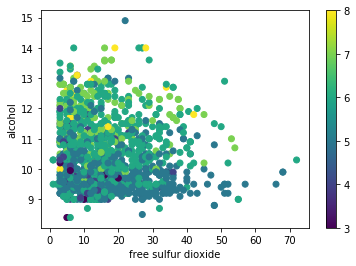

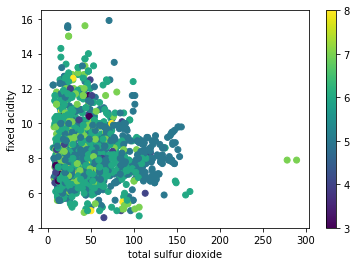

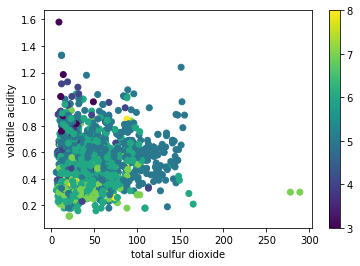

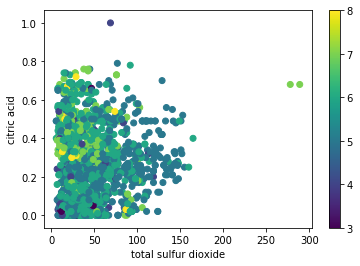

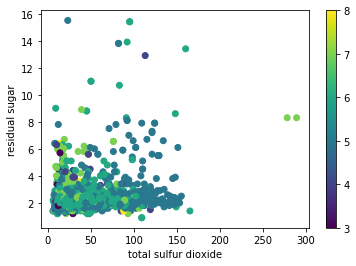

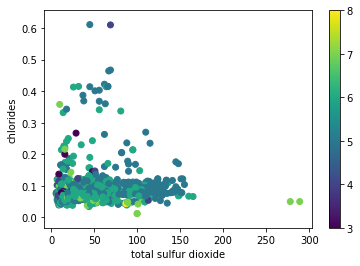

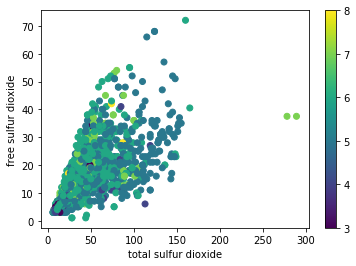

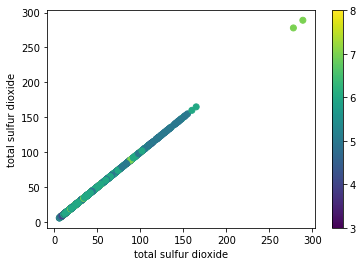

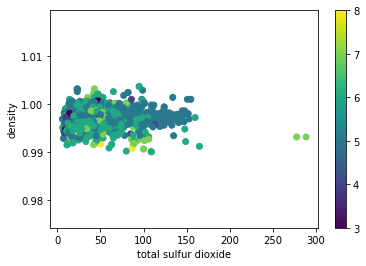

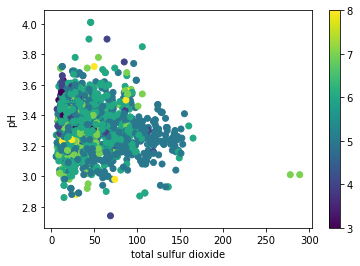

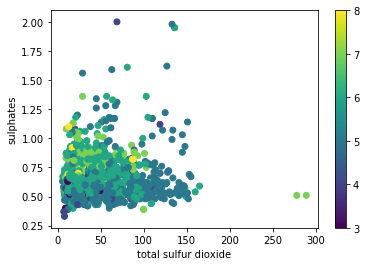

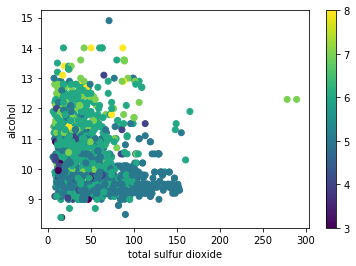

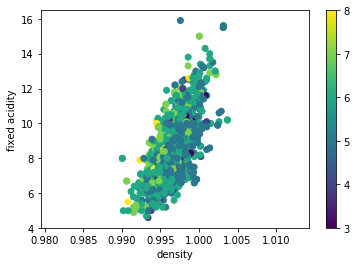

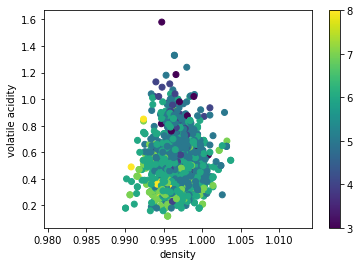

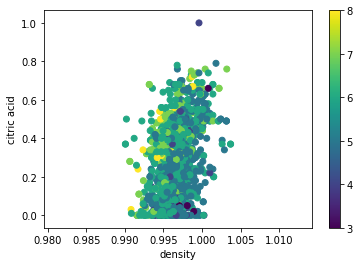

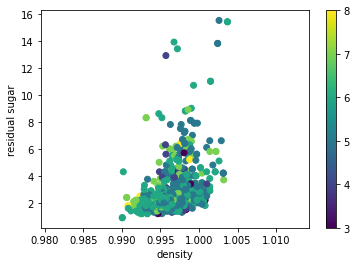

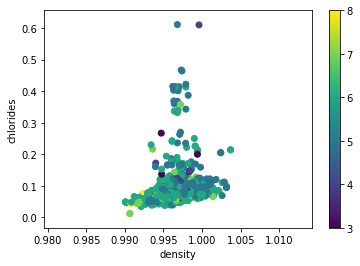

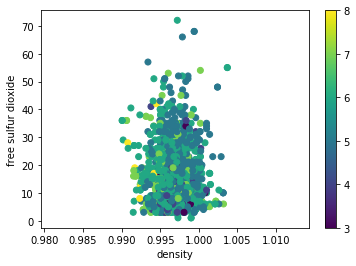

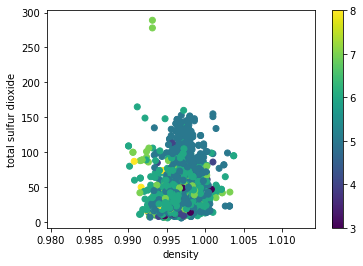

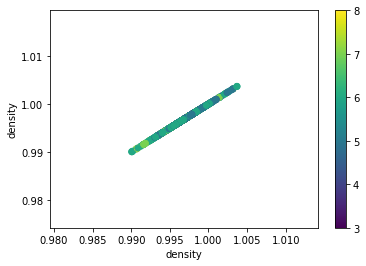

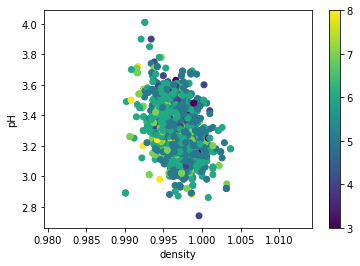

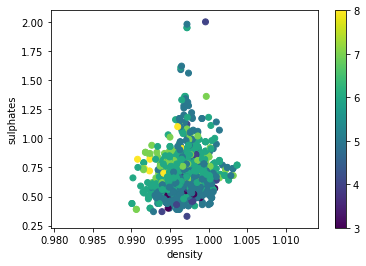

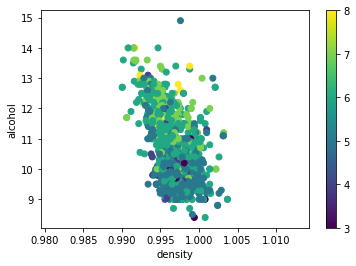

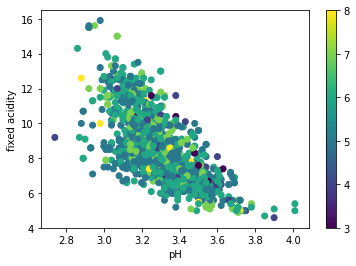

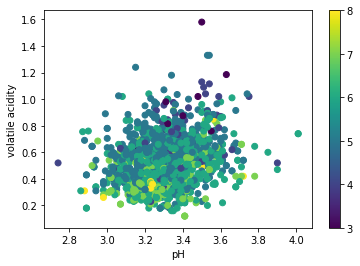

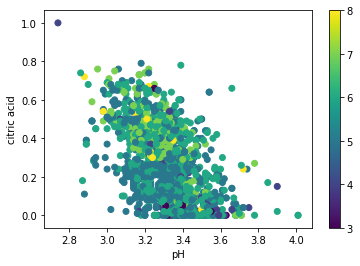

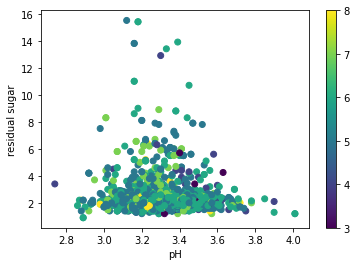

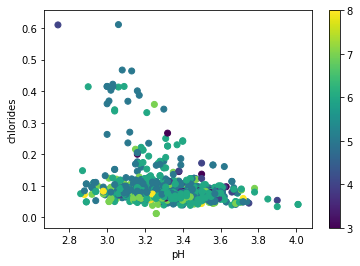

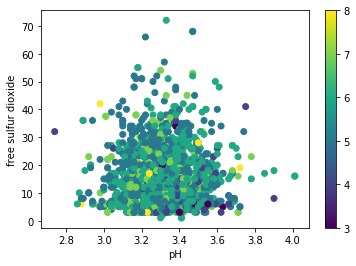

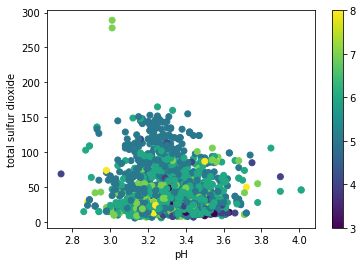

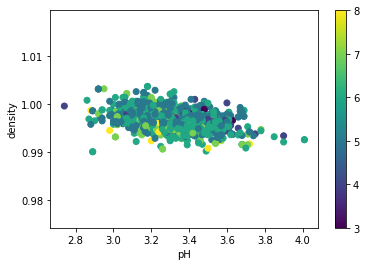

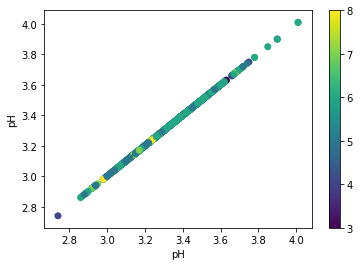

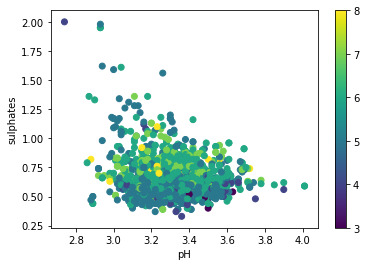

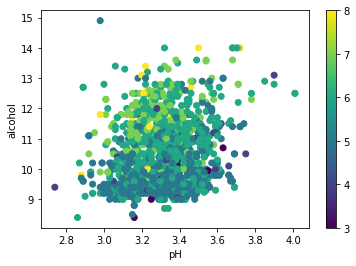

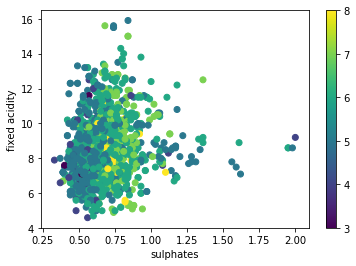

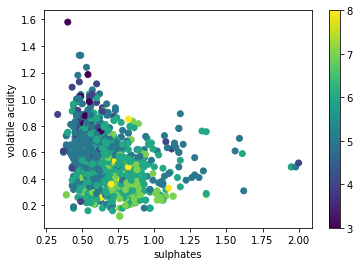

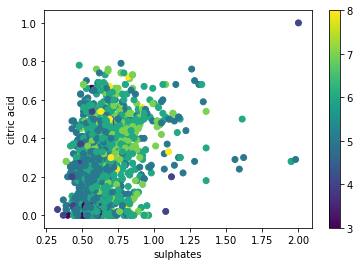

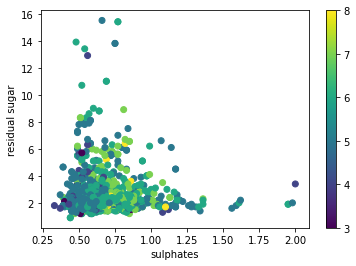

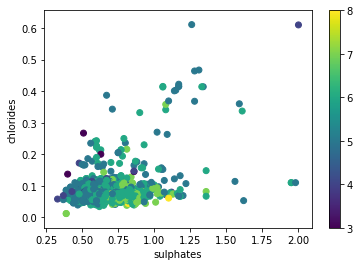

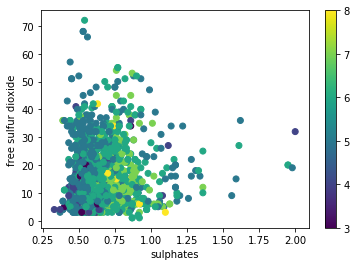

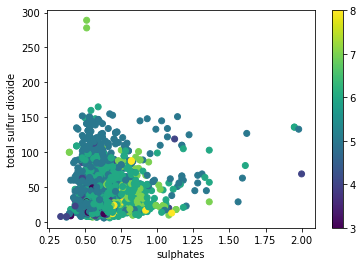

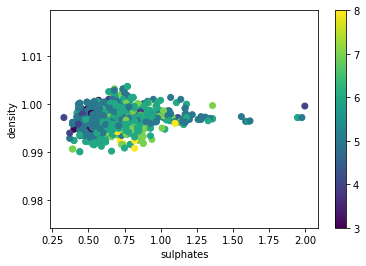

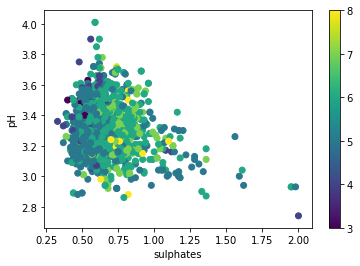

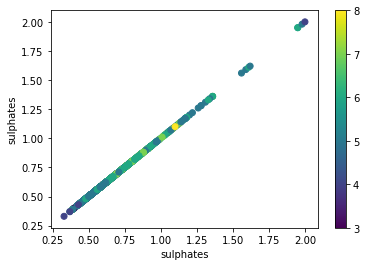

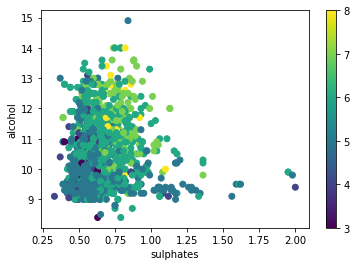

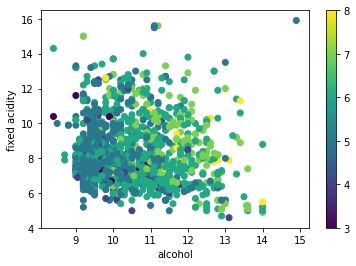

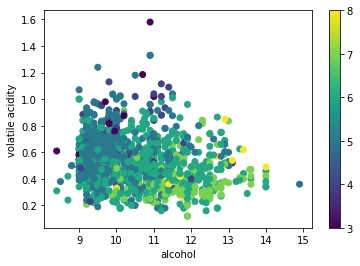

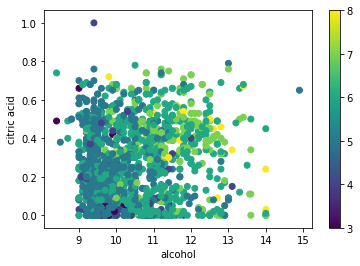

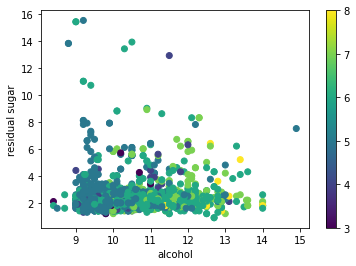

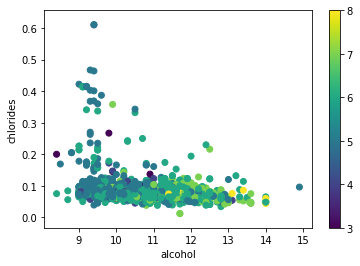

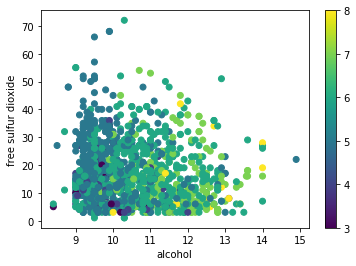

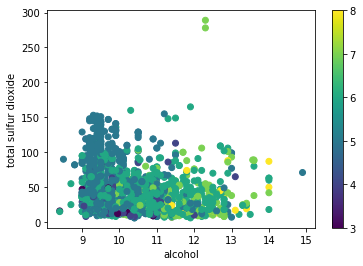

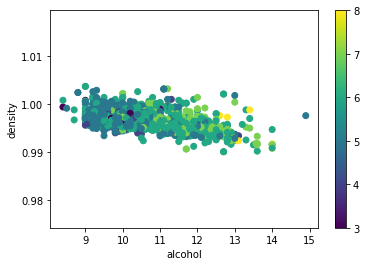

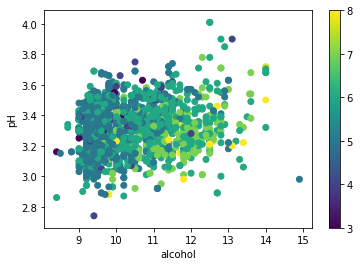

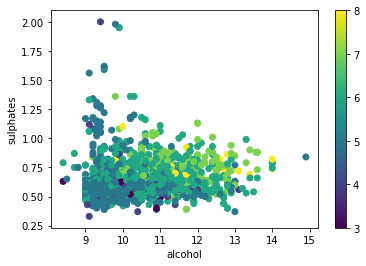

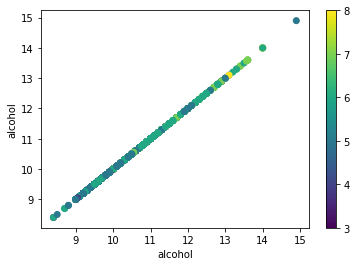

In [427]:
#Scaling the data seemed to have the greatest increase in performance so far, now let us see if we can further improve the results by lowering the dimensions of the problem.
import matplotlib.pyplot as plt

# plt.scatter(df['fixed acidity'],df['volatile acidity'],c=y)
# plt.xlabel("fixed acidity")
# plt.ylabel("volatile acidity")
# plt.colorbar()

headers = []
headers = list(x)

#headers[1]
#plt.scatter(df[headers[1]],df[headers[0]],c=y)

#Graphing all the various data we have in 2-Dimensions in order to see if any of them create a more seperated spread when grouped by quality values
def plot():
    for a in range(len(headers)):
        for i in range(len(headers)):
            plt.scatter(df[headers[a]], df[headers[i]], c=y)
            plt.xlabel(headers[a])
            plt.ylabel(headers[i])
            plt.colorbar()
            plt.show()

plot()



In [429]:
#From a visual observation of the data it looked like the Alcohol vs. pH graph had the most seperation between quality levels as compared to the other variables so lets see if 
#we just take into those two variables in a 2-D knn algorithm how the accuracy will turn out

y_low_dim = df_out['quality']

x_low_dim = df_out[['alcohol','pH']]

from sklearn.preprocessing import scale

xld = scale(x_low_dim)

from sklearn.cross_validation import train_test_split

xld_train, xld_test, y_train, y_test = train_test_split(xld, y_low_dim, test_size=0.2, random_state=1)

knn_low_dim = KNeighborsClassifier(n_neighbors=7)

knn_low_dim.fit(xld_train, y_train)

y_pred = knn_low_dim.predict(xld_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.5508474576271186


In [430]:
#Remembering back to the lecture Principle Component Analysis (PCA) is one of the techniques used in order to reduce the dimensions in a very high dimensional problem.
#Using the PCA tool from sklearn to modify the data into 2-Dimensions I once again computed the Accuracy of algorithm. 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(xs)

principalDf = pandas.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

from sklearn.cross_validation import train_test_split

principalDf_train, principalDf_test, y_train, y_test = train_test_split(principalDf, y_out, test_size=0.2, random_state=1)

knn_pca = KNeighborsClassifier(n_neighbors=7)

knn_pca.fit(principalDf_train, y_train)

y_pred = knn_pca.predict(principalDf_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.597457627118644


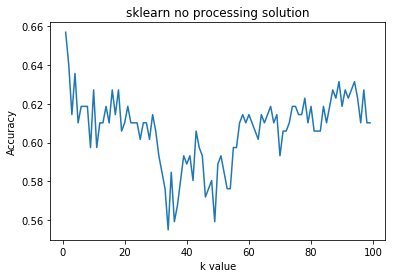

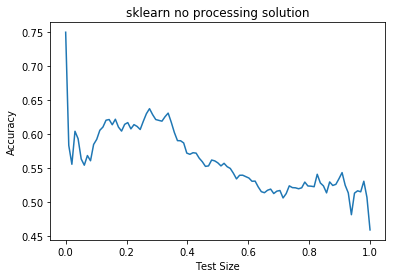

In [439]:
#From all the various modifications I made to the data in order to try and improve the accuracy of the predictive algorithm it appears that just scaling the data seemed to produce
#the best results. So using the accuracy that was found from just scaling the data I computed and graphed differing k-values and using differing amounts of the dataset as training
#data and plotted it to see what the most optimal combination might be.

from sklearn.preprocessing import scale

xs = scale(x_out)

from sklearn.cross_validation import train_test_split

xs_train, xs_test, y_train, y_test = train_test_split(xs, y_out, test_size=0.2, random_state=1)

knn_scaled = KNeighborsClassifier(n_neighbors=7)

knn_scaled.fit(xs_train, y_train)

y_pred = knn_scaled.predict(xs_test)


def neighbors():
        Accuracy=[]
        for i in range(1,100):
            knn_scaled = KNeighborsClassifier(n_neighbors=i)

            knn_scaled.fit(xs_train, y_train)

            y_pred = knn_scaled.predict(xs_test)

            from sklearn import metrics

            Accuracy.append(metrics.accuracy_score(y_test, y_pred))
        return Accuracy
    

plt.plot([i for i in range(1,100)],neighbors())
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("sklearn no processing solution")
plt.show()

def test():
    Test=[]
    for i in range (1,100):
        xs_train, xs_test, y_train, y_test = train_test_split(xs, y_out, test_size=(i/100), random_state=1)

        from sklearn.neighbors import KNeighborsClassifier

        knn_scaled = KNeighborsClassifier(n_neighbors=3)

        knn_scaled.fit(xs_train, y_train)

        y_pred = knn_scaled.predict(xs_test)

        from sklearn import metrics

        Test.append(metrics.accuracy_score(y_test, y_pred))
    return Test

plt.plot(np.linspace(0,1,99),test())
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.title("sklearn no processing solution")
plt.show()
